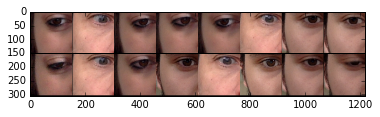

In [250]:
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.distributed as dist
import torch.optim
import torch.utils.data
import torch.utils.data.distributed
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
import matplotlib.pyplot as plt
import numpy as np

def show(img, gamma=.5, noise_level=.4, transpose=True):

    npimg = img.numpy()
    plt.figure()
    if transpose:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
    else:
        plt.imshow(npimg)

image_data = torchvision.datasets.ImageFolder('dataset',
transforms.Compose([transforms.CenterCrop(150),
transforms.ToTensor()]))

data_loader = torch.utils.data.DataLoader(image_data, batch_size=16,
shuffle=True)

dataiter = iter(data_loader)
images,foo = next(dataiter)

show(torchvision.utils.make_grid(images, normalize=True))


In [238]:
images.size()

torch.Size([1, 3, 150, 150])